# Modeling: 

## Stacking Regression

![Modeling](https://user-images.githubusercontent.com/67468718/111879997-1bbd6a80-8966-11eb-92c1-01c38cbdbe4a.JPG)



## 1. Introduction<a id='1_Introduction'></a>

Here comes the really fun step: modeling! For this step, we'll be:
 * Training multiple Regression algorithms.
 * Apply hyperparameters tuning where applicable to ensure every algorithm will result in best prediction possible.
 * Finally, evaluate these Models.

**Regression Models:**
 * Dummy Regression.
 * Linear Regression.
 * Ridge Regression (L2 Regularization).
 * Lasso Regression (L1 Regularization).
 * Decision Trees.
 * Random Forests.
 * GB.
 * XGBoost.
 * Light GBM.
 * Stacking.
 * Neural networks (ANN).
 
 
 **In This Notebook, We'll be training:**
 
 * Decision Trees
 * Random Forests
 * GB
 * XGBoost
 * Light GBM
 * Stacking



## 2. Sourcing and Loading<a id='2_Sourcing_and_Loading'></a> 

### 2.1 Import relevant libraries<a id='2.1_Import_relevant_libraries'></a> 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os 

plt.style.use('ggplot')

print('***Libraries are imported***')

***Libraries are imported***


### 2.2 Load the data<a id='2.2_Load_the_data'></a>

In [4]:
# Check Current Directory:
os.getcwd()

'C:\\Users\\aktha\\Desktop\\Future\\GOALLLLL\\capstone_two_House_Prices\\Modeling'

In [5]:
# Changing the directory:
os.chdir(r"C:/Users/aktha/Desktop/Future/GOALLLLL/capstone_two_House_Prices/Feature_Engineering/datasets")

In [6]:
#Confirm the directory:
os.getcwd()

'C:\\Users\\aktha\\Desktop\\Future\\GOALLLLL\\capstone_two_House_Prices\\Feature_Engineering\\datasets'

In [7]:
# List files/folders in the cd:
os.listdir()

['df_final_1.csv',
 'df_final_cluster.csv',
 'final.csv',
 'GreatSchools_NCA_df.csv',
 'house_final.csv',
 'house_final_1.csv',
 'house_final_2.csv',
 'house_final_3.csv',
 'house_loc.csv',
 'house_school_3.csv',
 'house_school_4.csv',
 'house_school_5.csv',
 'house_school_6.csv',
 'house_school_7.csv',
 'house_school_8.csv',
 'predictions.csv',
 'pre_processing_df.csv',
 'pre_processing_df_main.csv',
 'pre_processing_df_main_one.csv',
 'pre_processing_df_main_two.csv',
 'pre_processing_df_v1.csv',
 'pre_processing_df_v2.csv',
 'pre_processing_df_v3.csv',
 'pre_processing_df_v4.csv',
 'pre_processing_df_v5.csv',
 'pre_processing_df_v6.csv',
 'pre_processing_df_v7.csv',
 'pre_processing_df_v8.csv',
 'school_loc.csv',
 'test.csv',
 'test_melting_2.csv']

In [8]:
df = pd.read_csv('pre_processing_df_main_two.csv')

## 3. View and Visualize our dependent variable 'price'<a id='3._View_and_Visualize_our_dependent_variable_price'></a>

### 3.1 View the data<a id='3.1_View_the_data'></a>

In [9]:
#Let's check the df shape:
structure = df.shape
print("Final DataFrame 'df' has Rows:", structure[0], "and Columns: ", structure[1])

Final DataFrame 'df' has Rows: 6002 and Columns:  29


In [10]:
#Let's check the df shape:
df.head()

,property_type,zipcode,beds,baths,sqft,price,lot_size,days_on_market,price_per_sqft,hoa_month,...,university_count,barts,malls,universities,bedBath,AvgRoomSize,cluster_label,median_price_sqft_cluster,gsRating,distance_miles
0,1,94568,3,4,1994,905000,0,80,454,388.0,...,0,1,0,0,12,284.857,205,441.5,8.714286,2.267857
1,0,94568,4,4,3083,1250000,3058,143,405,232.0,...,0,1,0,0,16,385.375,205,441.5,8.714286,2.250000
2,0,94568,4,4,3180,1290000,4477,123,406,232.0,...,0,1,0,0,16,397.500,205,441.5,8.714286,2.227857
3,0,94568,4,2,2069,1105000,2851,21,534,237.0,...,0,1,0,0,8,344.833,205,441.5,8.909091,2.097273
4,2,94568,3,2,1387,725000,5806,51,523,325.0,...,0,1,0,0,6,277.400,274,551.0,7.333333,2.338333


In [11]:
# Summary Statistics:
df.describe()['price'].round(2)

count       6002.00
mean      867244.88
std       380264.13
min       165000.00
25%       579898.75
50%       790000.00
75%      1100000.00
max      1955000.00
Name: price, dtype: float64

### 3.2 Final Visualization of our dependent Variable 'price'<a id='3.2_Final_Visualization_of_our_dependent_variable_price'></a>

C:\Users\aktha\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


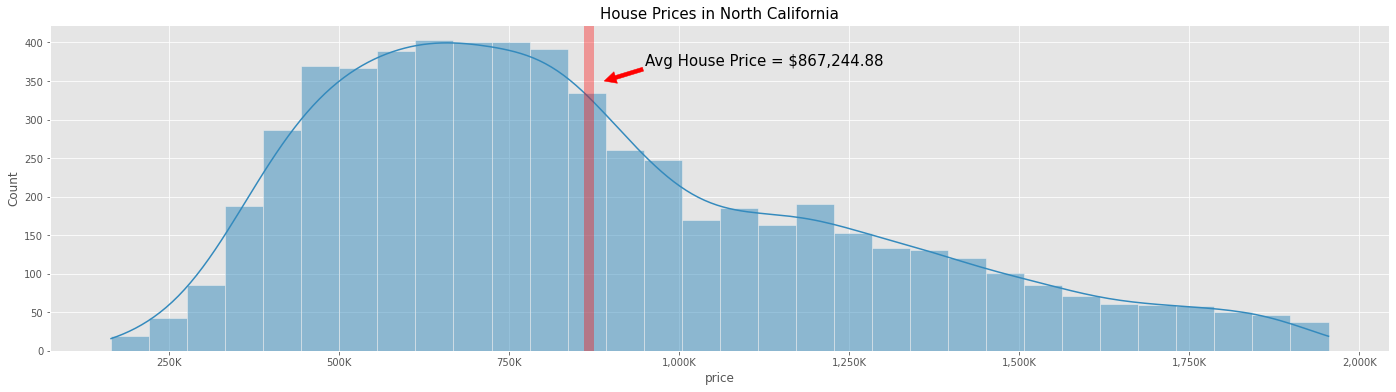

In [12]:
# Making a histogram of the price variable and adding average house sale:
f, ax = plt.subplots(figsize = (24,6))
ax = sns.histplot(x=df['price'], kde=True)
ax.axvline(df['price'].mean(), color='red', ls='-', alpha=0.35, lw=10)
plt.annotate('Avg House Price = $867,244.88', xy=(890000, 350), xytext=(950000, 370), arrowprops={'color':'red'}, fontsize=15)
ax.set_title('House Prices in North California', fontsize=15)
xlabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000]
ax.set_xticklabels(xlabels)
plt.grid(True)

## 4. Initial Features Selection: Define/Select Features<a id='4_Initial_Features_Selection:_Define/Select_Features'></a>


In [13]:
# let's check our final df columns:
df.columns

Index(['property_type', 'zipcode', 'beds', 'baths', 'sqft', 'price',
       'lot_size', 'days_on_market', 'price_per_sqft', 'hoa_month', 'lat',
       'long', 'property_age', 'school_rating', 'school_count',
       'median_income', 'hotness_score', 'supply_score', 'demand_score',
       'university_count', 'barts', 'malls', 'universities', 'bedBath',
       'AvgRoomSize', 'cluster_label', 'median_price_sqft_cluster', 'gsRating',
       'distance_miles'],
      dtype='object')

In [19]:
# Let's define/select our features: removing only 'price_per_sqft':
features = ['property_type', 'zipcode', 'beds', 'baths', 'sqft', 
           'lot_size', 'days_on_market', 'hoa_month', 'lat',
           'long', 'property_age', 'school_rating', 'school_count',
           'median_income', 'hotness_score', 'supply_score', 'demand_score',
           'university_count', 'barts', 'malls', 'universities', 'bedBath',
           'AvgRoomSize', 'cluster_label', 'median_price_sqft_cluster', 'gsRating',
           'distance_miles']
X = df[features]
y = df.price

## 5. Train/Test Split<a id='5_Train/Test_Split'></a>

Now, let's split our data (X) into training and testing splits, without letting a model learn anything about the test split.

let's have 75/25 Train/Test split

In [20]:
# Import train_test_split
from sklearn.model_selection import train_test_split


# Split into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1981)

## 6. Scaling and Transformation: Standardization<a id='6_Scaling_and_Transformation:_Standardization'></a>

**Standardization** finds the mean of our data and centers the distribution around it, calculating the number of standard deviations away from the mean each point is. The number of standard deviations are then used as our new values. This centers the data around 0 but technically has no limit to the maximum and minimum values.



In [21]:
# Import StandardScaler:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler:
scaler = StandardScaler()

# Fit & transform  scaler to the data:
X_train = scaler.fit_transform(X_train.astype(np.float))
X_test = scaler.transform(X_test.astype(np.float))


## 7. Modeling<a id='7_Modeling'></a>

### 7.1 Fitting Regression Models:<a id='7.1_Fitting_Regression_Models'></a>

 * Decision Trees
 * Random Forests
 * GB
 * XGBoost
 * Light GBM
 * Stacking


In [57]:
# Import necessary modules
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
import lightgbm as lgb

# Create below regressors: 
dtr = DecisionTreeRegressor(random_state=1981) 
rfg = RandomForestRegressor(random_state=1981) 
gbr = GradientBoostingRegressor(random_state=1981) 
xgb = XGBRegressor() 
gbm = lgb.LGBMRegressor(random_state=1981) 


# Fit the regressor to the training data
dtr.fit(X_train, y_train)
rfg.fit(X_train, y_train)
gbr.fit(X_train, y_train)
xgb.fit(X_train, y_train)
gbm.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R^2 -Decision Tree: {:.4f}".format(dtr.score(X_test, y_test) * 100), '%')
print("R^2 -Random Forest: {:.4f}".format(rfg.score(X_test, y_test) * 100), '%')
print("R^2 -Gradient Boost: {:.4f}".format(gbr.score(X_test, y_test) * 100), '%')
print("R^2 -XGBoost : {:.4f}".format(xgb.score(X_test, y_test) * 100), '%')
print("R^2 -Light GBM : {:.4f}".format(gbm.score(X_test, y_test) * 100), '%')

R^2 -Decision Tree: 83.7362 %
R^2 -Random Forest: 91.4473 %
R^2 -Gradient Boost: 90.8688 %
R^2 -XGBoost : 91.5950 %
R^2 -Light GBM : 92.1968 %


In [24]:
# Predict on the test data: y_pred_dtg
y_pred_dtr = dtr.predict(X_test)
y_pred_rfg = rfg.predict(X_test)
y_pred_gbr = gbr.predict(X_test)
y_pred_xgb = xgb.predict(X_test)
y_pred_lgbm = gbm.predict(X_test)


### 7.2 Evaluating Regression Models:<a id='7.2_Evaluating_Regression_Models'></a>

In [36]:
from sklearn import metrics
print("********Decision Trees Regression Model Evaluation********")
print("-------------------------------------------------------------")
print("R^2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_dtr) * 100), '%')
print("-------------------------------------------------------------")
print("Adjusted R^2 Score: {:.4f}".format((1 - (1-metrics.r2_score(y_test, y_pred_dtr))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))*100), '%')
print("-------------------------------------------------------------")
print("MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_dtr)))
print("-------------------------------------------------------------")
print("RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_dtr))))
print("-------------------------------------------------------------")
print("Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_dtr) * 100), '%')
print("_______________________________________________________________")
print("********Random Forests Regression Model Evaluation********")
print("-------------------------------------------------------------")
print("R^2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_rfg) * 100), '%')
print("-------------------------------------------------------------")
print("Adjusted R^2 Score: {:.4f}".format((1 - (1-metrics.r2_score(y_test, y_pred_rfg))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))*100), '%')
print("-------------------------------------------------------------")
print("MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_rfg)))
print("-------------------------------------------------------------")
print("RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfg))))
print("-------------------------------------------------------------")
print("Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_rfg) * 100), '%')
print("_______________________________________________________________")
print("********Gradient Boost Regression Model Evaluation********")
print("-------------------------------------------------------------")
print("R^2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_gbr) * 100), '%')
print("-------------------------------------------------------------")
print("Adjusted R^2 Score: {:.4f}".format((1 - (1-metrics.r2_score(y_test, y_pred_gbr))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))*100), '%')
print("-------------------------------------------------------------")
print("MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_gbr)))
print("-------------------------------------------------------------")
print("RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbr))))
print("-------------------------------------------------------------")
print("Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_gbr) * 100), '%')
print("_______________________________________________________________")
print("********XGBoost Regression Model Evaluation********")
print("-------------------------------------------------------------")
print("R^2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_xgb) * 100), '%')
print("-------------------------------------------------------------")
print("Adjusted R^2 Score: {:.4f}".format((1 - (1-metrics.r2_score(y_test, y_pred_xgb))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))*100), '%')
print("-------------------------------------------------------------")
print("MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_xgb)))
print("-------------------------------------------------------------")
print("RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb))))
print("-------------------------------------------------------------")
print("Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_xgb) * 100), '%')
print("_______________________________________________________________")
print("********Light GBM Model Evaluation********")
print("-------------------------------------------------------------")
print("R^2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_lgbm) * 100), '%')
print("-------------------------------------------------------------")
print("Adjusted R^2 Score: {:.4f}".format((1 - (1-metrics.r2_score(y_test, y_pred_lgbm))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))*100), '%')
print("-------------------------------------------------------------")
print("MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_lgbm)))
print("-------------------------------------------------------------")
print("RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_lgbm))))
print("-------------------------------------------------------------")
print("Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_lgbm) * 100), '%')



********Decision Trees Regression Model Evaluation********
-------------------------------------------------------------
R^2 Score: 84.5454 %
-------------------------------------------------------------
Adjusted R^2 Score: 84.2621 %
-------------------------------------------------------------
MAE: 99336.2012
-------------------------------------------------------------
RMSE:147934.2861
-------------------------------------------------------------
Variance Score:84.5661 %
_______________________________________________________________
********Random Forests Regression Model Evaluation********
-------------------------------------------------------------
R^2 Score: 91.4367 %
-------------------------------------------------------------
Adjusted R^2 Score: 91.2797 %
-------------------------------------------------------------
MAE: 71881.2010
-------------------------------------------------------------
RMSE:110118.6979
-------------------------------------------------------------
Varia

### 7.3 Features Importance:<a id='7.3_Features_Importance></a>

#### 7.3.1 Decision Tree Regression Tuning based on Features Importance<a id='7.3.1_Decision_Tree_Regression_Tuning_based_on_Features_Importance></a>

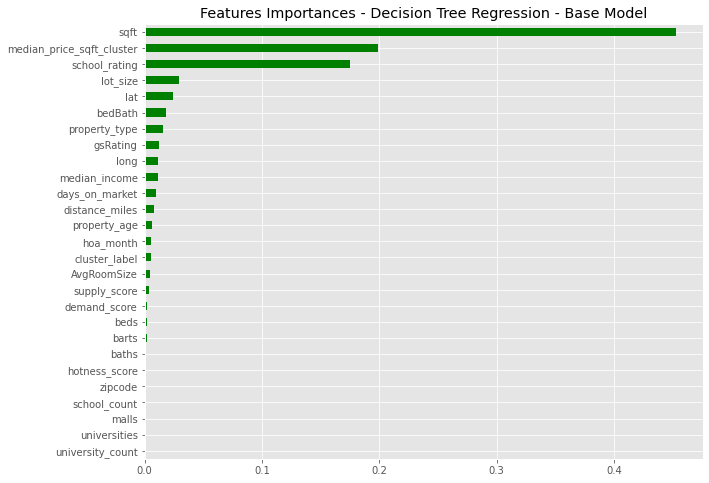

In [30]:
# First, let's create a pd.Series of features importances
importances_dtr = pd.Series(data=dtr.feature_importances_, index=X.columns)

# Sort importances
importances_sorted = importances_dtr.sort_values()

# Draw a horizontal barplot of importances_sorted
plt.figure(figsize=(10, 8))
importances_sorted.plot(kind='barh', color='green')
plt.title('Features Importances - Decision Tree Regression - Base Model')
plt.grid(True)
plt.show()

In [58]:
# let's check our final df columns:
df.columns

Index(['property_type', 'zipcode', 'beds', 'baths', 'sqft', 'price',
       'lot_size', 'days_on_market', 'price_per_sqft', 'hoa_month', 'lat',
       'long', 'property_age', 'school_rating', 'school_count',
       'median_income', 'hotness_score', 'supply_score', 'demand_score',
       'university_count', 'barts', 'malls', 'universities', 'bedBath',
       'AvgRoomSize', 'cluster_label', 'median_price_sqft_cluster', 'gsRating',
       'distance_miles'],
      dtype='object')

In [71]:
# Let's define/select our features: 
# based on above Features importance, let's drop 'baths', 'hotness_score', 'zipcode', 'school_count', 'malls', 'universities' and 'university_count':
features_dtr = ['property_type', 'beds', 'sqft',  'gsRating',
               'lot_size', 'days_on_market', 'hoa_month', 'lat',
               'long', 'property_age', 'school_rating', 'bedBath',
               'median_income', 'supply_score', 'demand_score',
               'barts', 'cluster_label', 'median_price_sqft_cluster',
               'AvgRoomSize', 'distance_miles']
X_dtr = df[features_dtr]
y_dtr = df.price

In [72]:
# Import train_test_split
from sklearn.model_selection import train_test_split


# Split into train and test sets:
X_train_dtr, X_test_dtr, y_train_dtr, y_test_dtr = train_test_split(X_dtr,
                                                                    y_dtr,
                                                                    test_size=0.25,
                                                                    random_state=1981)

In [73]:
# Import StandardScaler:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler:
scaler = StandardScaler()

# Fit & transform  scaler to the data:
X_train_dtr = scaler.fit_transform(X_train_dtr.astype(np.float))
X_test_dtr = scaler.transform(X_test_dtr.astype(np.float))


In [74]:
# Create below regressors: 
dtr_f = DecisionTreeRegressor(random_state=1981) 



# Fit the regressor to the training data
dtr_f.fit(X_train_dtr, X_test_dtr)

# Evaluate the model: R-Squared coefficient
print("R^2 -Decision Tree: {:.4f}".format(dtr_f.score(X_train_dtr, y_test_dtr) * 100), '%')


ValueError: Number of labels=1501 does not match number of samples=4501

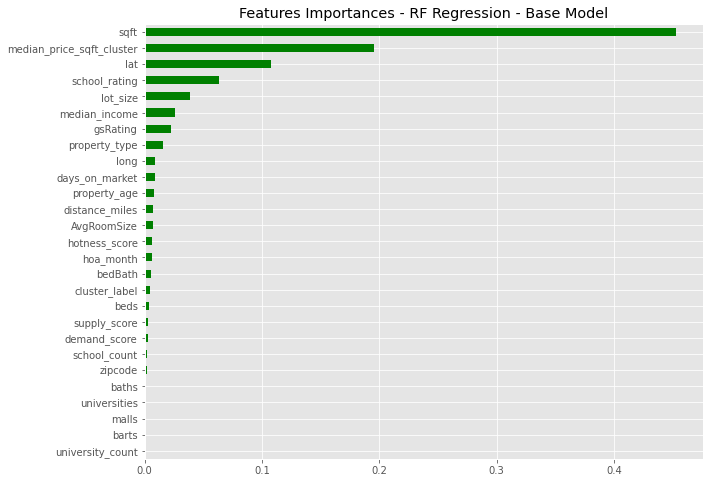

In [31]:
# First, let's create a pd.Series of features importances
importances_rfg = pd.Series(data=rfg.feature_importances_, index=X.columns)

# Sort importances
importances_sorted = importances_rfg.sort_values()

# Draw a horizontal barplot of importances_sorted
plt.figure(figsize=(10, 8))
importances_sorted.plot(kind='barh', color='green')
plt.title('Features Importances - RF Regression - Base Model')
plt.grid(True)
plt.show()

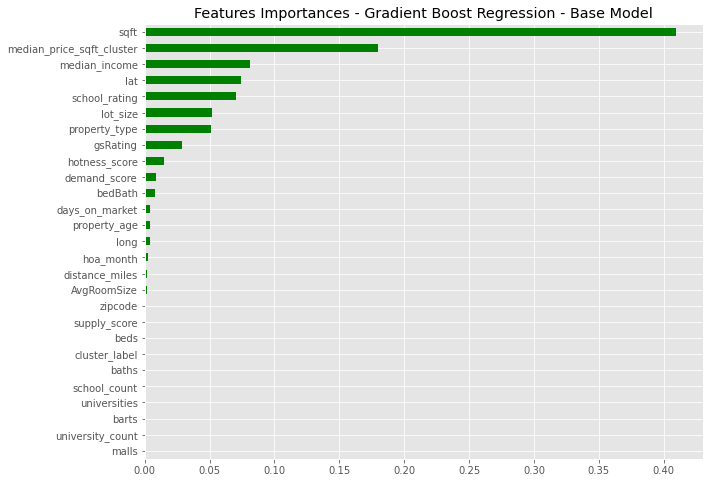

In [32]:
# First, let's create a pd.Series of features importances
importances_gbr = pd.Series(data=gbr.feature_importances_, index=X.columns)

# Sort importances
importances_sorted = importances_gbr.sort_values()

# Draw a horizontal barplot of importances_sorted
plt.figure(figsize=(10, 8))
importances_sorted.plot(kind='barh', color='green')
plt.title('Features Importances - Gradient Boost Regression - Base Model')
plt.grid(True)
plt.show()

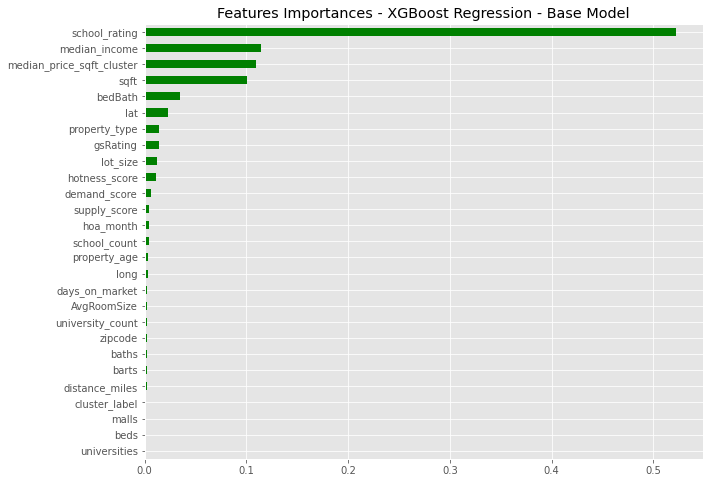

In [33]:
# First, let's create a pd.Series of features importances
importances_xgb = pd.Series(data=xgb.feature_importances_, index=X.columns)

# Sort importances
importances_sorted = importances_xgb.sort_values()

# Draw a horizontal barplot of importances_sorted
plt.figure(figsize=(10, 8))
importances_sorted.plot(kind='barh', color='green')
plt.title('Features Importances - XGBoost Regression - Base Model')
plt.grid(True)
plt.show()

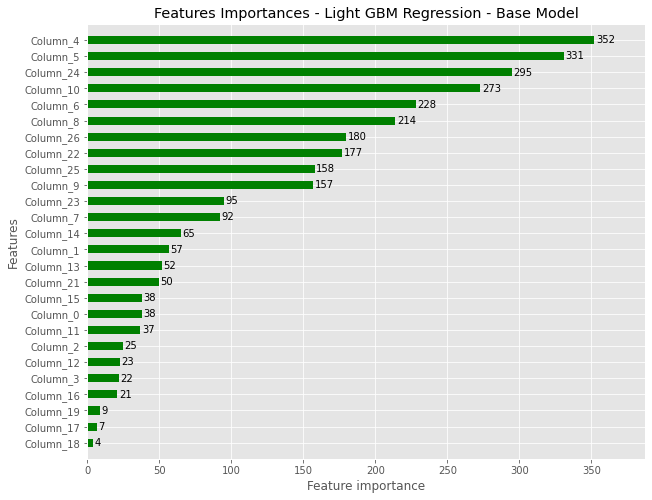

In [34]:
ax = lgb.plot_importance(gbm, max_num_features=30, figsize=(10,8), height=0.5, color='g')
plt.title('Features Importances - Light GBM Regression - Base Model')
plt.show()

In [38]:
pd.options.display.max_columns = None
df.head()

,property_type,zipcode,beds,baths,sqft,price,lot_size,days_on_market,price_per_sqft,hoa_month,lat,long,property_age,school_rating,school_count,median_income,hotness_score,supply_score,demand_score,university_count,barts,malls,universities,bedBath,AvgRoomSize,cluster_label,median_price_sqft_cluster,gsRating,distance_miles
0,1,94568,3,4,1994,905000,0,80,454,388.0,37.733978,-121.872736,3,8,11,119637,83.72,94.25,73.19,0,1,0,0,12,284.857,205,441.5,8.714286,2.267857
1,0,94568,4,4,3083,1250000,3058,143,405,232.0,37.737748,-121.876525,4,8,11,119637,83.72,94.25,73.19,0,1,0,0,16,385.375,205,441.5,8.714286,2.250000
2,0,94568,4,4,3180,1290000,4477,123,406,232.0,37.737013,-121.877507,3,8,11,119637,83.72,94.25,73.19,0,1,0,0,16,397.500,205,441.5,8.714286,2.227857
3,0,94568,4,2,2069,1105000,2851,21,534,237.0,37.736513,-121.873423,3,8,11,119637,83.72,94.25,73.19,0,1,0,0,8,344.833,205,441.5,8.909091,2.097273
4,2,94568,3,2,1387,725000,5806,51,523,325.0,37.699680,-121.956865,24,8,11,119637,83.72,94.25,73.19,0,1,0,0,6,277.400,274,551.0,7.333333,2.338333


## 8. Hyperparameters Tuning using GridSearchCV:<a id='8_Hyperparameters Tuning'></a>

### 8.1 GridSearchCV Decision Tree Regression<a id='8.1_GridSearchCV_Decision_Tree_Regression'></a>

In [45]:
# Import necessary modules
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Set the parameters by cross-validation
#params = [{'max_depth': max_depth,'n_estimators': n_estimators}]
params = [{'criterion': ['mse', 'mae'],
           'max_depth': [None, 2, 4, 6, 8, 10],
           'max_features': [None, 'auto', 'sqrt', 'log2'],
           'min_samples_split': [2, 4, 6, 8],
           'min_samples_leaf': [1, 3, 5, 7, 9, 11]
          }]

# Create a DecisionTreeRegressor regressor: dtr_search_1
dtr_search_1 = DecisionTreeRegressor(random_state=1981) 

#cross validation
folds = 3

# Setup the GridSearchCV object: rfg_cv_all
#xgb_cv_all = GridSearchCV(estimator = xgb_search_1, 
 #                          param_grid = params, 
  #                         scoring= 'neg_mean_squared_error', 
   #                        cv = folds, n_jobs=-1,
    #                       return_train_score=True, verbose = 2)   

# Setup the RandomizedSearchCV object: dtr_cv
dtr_cv = RandomizedSearchCV(estimator = dtr_search_1, 
                               param_distributions = params, 
                               scoring= 'neg_mean_squared_error', 
                               n_iter = 200, cv = folds, n_jobs=1,
                               return_train_score=True, verbose = 2)   

# Fit it to the training data
dtr_cv.fit(X_train, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
[CV] END criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END criterion=mse, max_depth=4, max_features=sqrt, min_samples_leaf=3, min_samples_split=4; total time=   0.0s
[CV] END criterion=mae, max_depth=4, max_features=None, min_samples_leaf=7, min_samples_split=4; total time=   0.4s
[CV] END criterion=mae, max_depth=4, max_features=None, min_samples_leaf=7, min_samples_split=4; total time=   0.3s
[CV] END criterion=mae, max_depth=4, max_features=None, min_samples_leaf=7, min_samples_split=4; total time=   0.3s
[CV] END criterion=mae, max_depth=8, max_features=None, min_samples_leaf=1, min_samples_split=8; total time=   0.5s
[CV] END criterion=mae, max_depth=8, max_features=None, min_samples_leaf=1, min_samples_split=8; total time=   0.4s
[CV] END 

[CV] END criterion=mae, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=mae, max_depth=8, max_features=log2, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=mse, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=mse, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=mse, max_depth=8, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=mse, max_depth=8, max_features=log2, min_samples_leaf=11, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_depth=8, max_features=log2, min_samples_leaf=11, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_depth=8, max_features=log2, min_samples_leaf=11, min_samples_split=6; total time=   0.0s
[CV] END criterion=mae, max_depth=2, max_features=sqrt, min_samples_l

[CV] END criterion=mae, max_depth=2, max_features=sqrt, min_samples_leaf=11, min_samples_split=2; total time=   0.0s
[CV] END criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV] END criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV] END criterion=mse, max_depth=2, max_features=auto, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV] END criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV] END criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV] END criterion=mse, max_depth=2, max_features=sqrt, min_samples_leaf=3, min_samples_split=2; total time=   0.0s
[CV] END criterion=mae, max_depth=6, max_features=None, min_samples_leaf=5, min_samples_split=8; total time=   0.4s
[CV] END criterion=mae, max_depth=6, max_features=None, min_samples_lea

[CV] END criterion=mae, max_depth=None, max_features=sqrt, min_samples_leaf=11, min_samples_split=2; total time=   0.0s
[CV] END criterion=mae, max_depth=None, max_features=sqrt, min_samples_leaf=11, min_samples_split=2; total time=   0.0s
[CV] END criterion=mae, max_depth=None, max_features=sqrt, min_samples_leaf=7, min_samples_split=4; total time=   0.0s
[CV] END criterion=mae, max_depth=None, max_features=sqrt, min_samples_leaf=7, min_samples_split=4; total time=   0.0s
[CV] END criterion=mae, max_depth=None, max_features=sqrt, min_samples_leaf=7, min_samples_split=4; total time=   0.0s
[CV] END criterion=mse, max_depth=6, max_features=auto, min_samples_leaf=11, min_samples_split=2; total time=   0.0s
[CV] END criterion=mse, max_depth=6, max_features=auto, min_samples_leaf=11, min_samples_split=2; total time=   0.0s
[CV] END criterion=mse, max_depth=6, max_features=auto, min_samples_leaf=11, min_samples_split=2; total time=   0.0s
[CV] END criterion=mse, max_depth=2, max_features=au

[CV] END criterion=mae, max_depth=4, max_features=sqrt, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV] END criterion=mse, max_depth=4, max_features=None, min_samples_leaf=7, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_depth=4, max_features=None, min_samples_leaf=7, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_depth=4, max_features=None, min_samples_leaf=7, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV] END criterion=mse, max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV] END criterion=mse, max_depth=10, max_features=None, min_samples_leaf=5, min_samples_split=8; total time=   0.0s
[CV] END criterion=mse, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=mse, max_depth=4, max_features=auto, min_samples_l

[CV] END criterion=mae, max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=8; total time=   0.4s
[CV] END criterion=mae, max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=8; total time=   0.4s
[CV] END criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=9, min_samples_split=4; total time=   0.0s
[CV] END criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=9, min_samples_split=4; total time=   0.0s
[CV] END criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=9, min_samples_split=4; total time=   0.0s
[CV] END criterion=mse, max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=2; total time=   0.0s
[CV] END criterion=mse, max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=2; total time=   0.0s
[CV] END criterion=mse, max_depth=6, max_features=auto, min_samples_leaf=7, min_samples_split=2; total time=   0.0s
[CV] END criterion=mae, max_depth=6, max_features=sqrt, min_samples_leaf

[CV] END criterion=mae, max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=4; total time=   0.1s
[CV] END criterion=mae, max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=4; total time=   0.1s
[CV] END criterion=mae, max_depth=None, max_features=log2, min_samples_leaf=5, min_samples_split=4; total time=   0.0s
[CV] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=4; total time=   0.5s
[CV] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=4; total time=   0.5s
[CV] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=4; total time=   0.5s
[CV] END criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_depth=4, max_features=log2, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_depth=4, max_features=log2, min_

[CV] END criterion=mae, max_depth=4, max_features=None, min_samples_leaf=1, min_samples_split=8; total time=   0.3s
[CV] END criterion=mae, max_depth=4, max_features=None, min_samples_leaf=1, min_samples_split=8; total time=   0.3s
[CV] END criterion=mae, max_depth=4, max_features=None, min_samples_leaf=1, min_samples_split=8; total time=   0.3s
[CV] END criterion=mse, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=mse, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=mse, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4; total time=   0.0s
[CV] END criterion=mse, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_depth=6, max_features=None, min_samples_leaf=3, min_samples_split=6; total time=   0.0s
[CV] END criterion=mse, max_depth=6, max_features=None, min_sam

[CV] END criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=8; total time=   0.0s
[CV] END criterion=mae, max_depth=4, max_features=log2, min_samples_leaf=7, min_samples_split=8; total time=   0.0s
[CV] END criterion=mae, max_depth=8, max_features=log2, min_samples_leaf=9, min_samples_split=2; total time=   0.0s
[CV] END criterion=mae, max_depth=8, max_features=log2, min_samples_leaf=9, min_samples_split=2; total time=   0.0s
[CV] END criterion=mae, max_depth=8, max_features=log2, min_samples_leaf=9, min_samples_split=2; total time=   0.0s
[CV] END criterion=mse, max_depth=None, max_features=log2, min_samples_leaf=7, min_samples_split=4; total time=   0.0s
[CV] END criterion=mse, max_depth=None, max_features=log2, min_samples_leaf=7, min_samples_split=4; total time=   0.0s
[CV] END criterion=mse, max_depth=None, max_features=log2, min_samples_leaf=7, min_samples_split=4; total time=   0.0s
[CV] END criterion=mae, max_depth=2, max_features=sqrt, min_sam

RandomizedSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=1981),
                   n_iter=200, n_jobs=1,
                   param_distributions=[{'criterion': ['mse', 'mae'],
                                         'max_depth': [None, 2, 4, 6, 8, 10],
                                         'max_features': [None, 'auto', 'sqrt',
                                                          'log2'],
                                         'min_samples_leaf': [1, 3, 5, 7, 9,
                                                              11],
                                         'min_samples_split': [2, 4, 6, 8]}],
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=2)

In [46]:
#checking the value of optimum number of parameters
print("Tuned Decision Tree Regression Parameters: {}".format(dtr_cv.best_params_))
print("Tuned Decision Tree - Best neg_mean_squared_error Score is {:.4f}".format(dtr_cv.best_score_))

Tuned Decision Tree Regression Parameters: {'min_samples_split': 2, 'min_samples_leaf': 11, 'max_features': 'auto', 'max_depth': None, 'criterion': 'mse'}
Tuned Decision Tree - Best neg_mean_squared_error Score is -19940963406.8390


In [39]:
# let's check our final df columns:
df.columns

Index(['property_type', 'zipcode', 'beds', 'baths', 'sqft', 'price',
       'lot_size', 'days_on_market', 'price_per_sqft', 'hoa_month', 'lat',
       'long', 'property_age', 'school_rating', 'school_count',
       'median_income', 'hotness_score', 'supply_score', 'demand_score',
       'university_count', 'barts', 'malls', 'universities', 'bedBath',
       'AvgRoomSize', 'cluster_label', 'median_price_sqft_cluster', 'gsRating',
       'distance_miles'],
      dtype='object')

In [40]:
# Now based on above features importance, let's select only the below features
features = ['property_type',  'beds', 'baths', 'sqft', 'zipcode',
       'lot_size', 'days_on_market', 'hoa_month', 'lat',
       'long', 'property_age', 'gsRating',
       'median_income','university_count', 'malls', 
       'median_price_sqft_cluster', 'cluster_label'] 

X = df[features]
y = df.price

In [41]:
# Import train_test_split
from sklearn.model_selection import train_test_split


# Split into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
 
                                                    random_state=1981)

# Import StandardScaler:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler:
scaler = StandardScaler()

# Fit & transform  scaler to the data:
X_train = scaler.fit_transform(X_train.astype(np.float))
X_test = scaler.transform(X_test.astype(np.float))


In [42]:
# Create below regressors: 
dtr_t = DecisionTreeRegressor(random_state=1981) 
rfg_t = RandomForestRegressor(random_state=1981) 
gbr_t = GradientBoostingRegressor(random_state=1981) 
xgb_t = XGBRegressor() 
gbm_t = lgb.LGBMRegressor(random_state=1981) 


# Fit the regressor to the training data
dtr_t.fit(X_train, y_train)
rfg_t.fit(X_train, y_train)
gbr_t.fit(X_train, y_train)
xgb_t.fit(X_train, y_train)
gbm_t.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R^2 -Decision Tree: {:.4f}".format(dtr_t.score(X_test, y_test) * 100), '%')
print("R^2 -Random Forest: {:.4f}".format(rfg_t.score(X_test, y_test) * 100), '%')
print("R^2 -Gradient Boost: {:.4f}".format(gbr_t.score(X_test, y_test) * 100), '%')
print("R^2 -XGBoost : {:.4f}".format(xgb_t.score(X_test, y_test) * 100), '%')
print("R^2 -Light GBM : {:.4f}".format(gbm_t.score(X_test, y_test) * 100), '%')

R^2 -Decision Tree: 83.7362 %
R^2 -Random Forest: 91.4473 %
R^2 -Gradient Boost: 90.8688 %
R^2 -XGBoost : 91.5950 %
R^2 -Light GBM : 92.1968 %


In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


#rfg = RandomForestRegressor(n_estimators=750, random_state=1981) 
#xgb = XGBRegressor(n_estimators=750, learning_rate=0.01) 
#gbr = GradientBoostingRegressor(n_estimators=750, learning_rate=0.01, random_state=1981) 


rfg = RandomForestRegressor(max_features='log2',random_state=1981) 
xgb = XGBRegressor() 
#gbr = GradientBoostingRegressor(random_state=1981) 
gbm = lgb.LGBMRegressor(random_state=1981) 

# Get these models in a list

estimators = [('Random Forest', rfg),
              ('XGB', xgb),
              #('Gradient Boosting', gbr)
              ('light GBM', gbm)              
             ]

#Stack these models with StackingRegressor
stacking_regressor = StackingRegressor(estimators=estimators, n_jobs =-1, verbose = 1,
                                       final_estimator=RidgeCV())
                               
                                       
# Fit the regressor to the training data
stacking_regressor.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R-Squared -stacked: {:.4f}".format(stacking_regressor.score(X_test, y_test) * 100), '%')


In [ ]:
# Predict on the test data: y_pred_stack
y_pred_stack = stacking_regressor.predict(X_test)

In [ ]:
from sklearn import metrics
print("********Light GBM Regression Model Evaluation********")
print("-------------------------------------------------------------")
print("Light GBM Regression - r2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_lgbm) * 100), '%')
print("-------------------------------------------------------------")
print("Light GBM Regression - Adjusted r^2 Score: {:.4f}".format(1 - (1-metrics.r2_score(y_test, y_pred_lgbm))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)))
print("-------------------------------------------------------------")
print("Light GBM Regression - RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_lgbm))))
print("-------------------------------------------------------------")
print("Light GBM Regression - MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_lgbm)))
print("-------------------------------------------------------------")
print("Light GBM Regression - MSE:{:.4f}".format(metrics.mean_squared_error(y_test, y_pred_lgbm)))
print("-------------------------------------------------------------")
print("Light GBM Regression - Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_lgbm) * 100), '%')
print("_____________________________________________________________________________")

print("********stack Regression Model Evaluation (Baseline)********")
print("-------------------------------------------------------------")
print("stack Regression - r2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_stack) * 100), '%')
print("-------------------------------------------------------------")
print("stack Regression - Adjusted r^2 Score: {:.4f}".format(1 - (1-metrics.r2_score(y_test, y_pred_stack))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)))
print("-------------------------------------------------------------")
print("stack Regression - MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_stack)))
print("-------------------------------------------------------------")
print("stack Regression - MSE:{:.4f}".format(metrics.mean_squared_error(y_test, y_pred_stack)))
print("-------------------------------------------------------------")
print("stack Regression - RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_stack))))
print("-------------------------------------------------------------")
print("stack Regression - Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_stack) * 100), '%')
print("_____________________________________________________________________________")

In [ ]:
# Import necessary modules
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Set the parameters by cross-validation
#params = [{'max_depth': max_depth,'n_estimators': n_estimators}]
params = [{'n_estimators': [100, 200, 300, 400, 500, 600, 800, 1000],
           'max_depth': [4, 5, 6, 7],
         #  'learning_rate': [0.05, 0.1, 0.15, 0.2]
          }]

# Create a XGBRegressor regressor: xgb_search_1
xgb_search_1 = XGBRegressor() 

#cross validation
folds = 3

# Setup the GridSearchCV object: rfg_cv_all
#xgb_cv_all = GridSearchCV(estimator = xgb_search_1, 
 #                          param_grid = params, 
  #                         scoring= 'neg_mean_squared_error', 
   #                        cv = folds, n_jobs=-1,
    #                       return_train_score=True, verbose = 2)   

# Setup the RandomizedSearchCV object: xgb_cv
xgb_cv = RandomizedSearchCV(estimator = xgb_search_1, 
                               param_distributions = params, 
                               scoring= 'neg_mean_squared_error', 
                               n_iter = 50, cv = folds, n_jobs=1,
                               return_train_score=True, verbose = 2)   

# Fit it to the training data
xgb_cv.fit(X_train, y_train)

In [ ]:
#checking the value of optimum number of parameters
print("Tuned XGBoost Regression Parameters: {}".format(xgb_cv.best_params_))
print("Tuned XGBoost - Best neg_mean_squared_error Score is {:.4f}".format(xgb_cv.best_score_))

In [ ]:
# Import necessary modules
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Set the parameters by cross-validation
#params = [{'max_depth': max_depth,'n_estimators': n_estimators}]
params = [{'n_estimators': [500, 600, 800, 1000],
           'max_depth': [18, 20, 22, 24],
           'max_features': ['auto', 'sqrt', 'log2']
          }]

# Create a XGBRegressor regressor: rfg_search_1
rfg_search_1 = RandomForestRegressor(random_state=1981)

#cross validation
folds = 3

# Setup the GridSearchCV object: rfg_cv_all
#xgb_cv_all = GridSearchCV(estimator = xgb_search_1, 
 #                          param_grid = params, 
  #                         scoring= 'neg_mean_squared_error', 
   #                        cv = folds, n_jobs=-1,
    #                       return_train_score=True, verbose = 2)   

# Setup the RandomizedSearchCV object: xgb_cv
rfg_cv = RandomizedSearchCV(estimator = rfg_search_1, 
                               param_distributions = params, 
                               scoring= 'neg_mean_squared_error', 
                               n_iter = 48, cv = folds, n_jobs=1,
                               return_train_score=True, verbose = 2)   

# Fit it to the training data
rfg_cv.fit(X_train, y_train)

In [ ]:
#checking the value of optimum number of parameters
print("Tuned Random Forests Regression Parameters: {}".format(rfg_cv.best_params_))
print("Tuned Random Forests - Best neg_mean_squared_error Score is {:.4f}".format(rfg_cv.best_score_))

In [ ]:
# Import necessary modules
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Set the parameters by cross-validation
#params = [{'max_depth': max_depth,'n_estimators': n_estimators}]
params = [{'n_estimators': [100, 150, 200, 400, 600],
           'max_depth': [-1, 4, 5, 6, 7, 8],
           'learning_rate': [0.05, 0.1, 0.15, 0.2]
          }]

# Create a XGBRegressor regressor: gbm_search_1
gbm_search_1 = lgb.LGBMRegressor(random_state=1981) 

#cross validation
folds = 3

# Setup the GridSearchCV object: rfg_cv_all
#xgb_cv_all = GridSearchCV(estimator = xgb_search_1, 
 #                          param_grid = params, 
  #                         scoring= 'neg_mean_squared_error', 
   #                        cv = folds, n_jobs=-1,
    #                       return_train_score=True, verbose = 2)   

# Setup the RandomizedSearchCV object: xgb_cv
gbm_cv = RandomizedSearchCV(estimator = gbm_search_1, 
                               param_distributions = params, 
                               scoring= 'neg_mean_squared_error', 
                               n_iter = 50, cv = folds, n_jobs=1,
                               return_train_score=True, verbose = 2)   

# Fit it to the training data
gbm_cv.fit(X_train, y_train)

In [ ]:
#checking the value of optimum number of parameters
print("Tuned Light GBM Regression Parameters: {}".format(gbm_cv.best_params_))
print("Tuned Light GBM - Best neg_mean_squared_error Score is {:.4f}".format(gbm_cv.best_score_))

In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
import lightgbm as lgb

# Best Result: GridSearchCV
#Tuned Random Forest Regression Parameters: {'max_depth': 15, 'n_estimators': 550}
#Tuned XGBoost Regression Parameters: {'learning_rate': 0.04, 'max_depth': 5, 'n_estimators': 750}
#Tuned GB Regression Parameters: {'learning_rate': 0.06, 'max_depth': 5, 'n_estimators': 350}    

#best result:92.0955 %
#rfg = RandomForestRegressor(n_estimators=500, max_depth = 14, random_state=1981) 
#xgb = XGBRegressor(learning_rate=0.04, max_depth = 5, n_estimators=750) 
#gbr = GradientBoostingRegressor(learning_rate=0.001, n_estimators=350, max_depth = 5, random_state=1981) 
#dtr = DecisionTreeRegressor(min_samples_leaf=8, max_depth = 5, random_state=1981) 
#gbm = lgb.LGBMRegressor(learning_rate=0.0005, max_depth = 5, n_estimators=850, random_state=1981) 

#rfg = RandomForestRegressor(n_estimators=700, max_depth = 14, random_state=1981) 
#xgb = XGBRegressor(learning_rate=0.04, max_depth = 4, n_estimators=750) #750
#gbr = GradientBoostingRegressor(learning_rate=0.0005, n_estimators=350, max_depth = 5, random_state=1981) 
#dtr = DecisionTreeRegressor(min_samples_leaf=8, max_depth = 5, random_state=1981) 
#gbm = lgb.LGBMRegressor(learning_rate=0.0005, max_depth = 5, n_estimators=850, random_state=1981) #850

#rfg = RandomForestRegressor(max_features='log2', max_depth = 16, random_state=1981) 
#xgb = XGBRegressor(learning_rate= 0.1,n_estimators=300) 
#gbr = GradientBoostingRegressor(learning_rate=0.0005, n_estimators=350, max_depth = 5, random_state=1981) 
#dtr = DecisionTreeRegressor(min_samples_leaf=8, max_depth = 5, random_state=1981) 
#gbm = lgb.LGBMRegressor(n_estimators=150, random_state=1981) 


#Tuned Random Forests Regression Parameters: {'n_estimators': 800, 'max_features': 'sqrt', 'max_depth': 18}
#Tuned XGBoost Regression Parameters: {'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.05}
#Tuned Light GBM Regression Parameters: {'n_estimators': 400, 'max_depth': 4, 'learning_rate': 0.1}

rfg = RandomForestRegressor(max_features='log2', max_depth = 16, random_state=1981) 
xgb = XGBRegressor(learning_rate= 0.1,n_estimators=300) 
#gbr = GradientBoostingRegressor(learning_rate=0.0005, n_estimators=350, max_depth = 5, random_state=1981) 
#dtr = DecisionTreeRegressor(min_samples_leaf=8, max_depth = 5, random_state=1981) 
gbm = lgb.LGBMRegressor(n_estimators=150,random_state=1981) 





# Get these models in a list

estimators = [('Random Forest', rfg),
              ('XGB', xgb),
              #('Gradient Boosting', gbr),
              #('Decision Tree', dtr),
              ('light GBM', gbm)
             ]

#Stack these models with StackingRegressor
stacking_tuned = StackingRegressor(estimators=estimators, n_jobs =-1, verbose = 1,
                                  final_estimator=RidgeCV())
                                       
                                       
# Fit the regressor to the training data
stacking_tuned.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R-Squared -stacked: {:.4f}".format(stacking_tuned.score(X_test, y_test) * 100), '%')





In [ ]:
# Predict on the test data: y_pred_stack
y_pred_stack_t = stacking_tuned.predict(X_test)

In [ ]:
from sklearn import metrics
print("********stacking Regression Model Evaluation (Baseline)********")
print("-------------------------------------------------------------")
print("stacking Regression - r2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_stack) * 100), '%')
print("-------------------------------------------------------------")
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_pred_stack))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("-------------------------------------------------------------")
print("stacking Regression - MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_stack)))
print("-------------------------------------------------------------")
print("stacking Regression - MSE:{:.4f}".format(metrics.mean_squared_error(y_test, y_pred_stack)))
print("-------------------------------------------------------------")
print("stacking Regression - RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_stack))))
print("-------------------------------------------------------------")
print("stacking Regression - Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_stack) * 100), '%')
print("_____________________________________________________________________________")

print("********Tuned stacking Regression Model Evaluation (Tuned)********")
print("-------------------------------------------------------------")
print("Tuned stacking Regression - r2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_stack_t) * 100), '%')
print("-------------------------------------------------------------")
print("Tuned stacking Regression - MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_stack_t)))
print("-------------------------------------------------------------")
print("Tuned stacking Regression - MSE:{:.4f}".format(metrics.mean_squared_error(y_test, y_pred_stack_t)))
print("-------------------------------------------------------------")
print("Tuned stacking Regression - RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_stack_t))))
print("-------------------------------------------------------------")
print("Tuned stacking Regression - Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_stack_t) * 100), '%')
print("_____________________________________________________________________________")

In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR


#rfg = RandomForestRegressor(n_estimators=750, random_state=1981) 
#xgb = XGBRegressor(n_estimators=750, learning_rate=0.01) 
#gbr = GradientBoostingRegressor(n_estimators=750, learning_rate=0.01, random_state=1981) 


rfg = RandomForestRegressor(n_estimators=350, random_state=42) 
xgb = XGBRegressor(learning_rate=0.07, n_estimators=100, gamma=0.0468) 
gbr = GradientBoostingRegressor(learning_rate=0.05, n_estimators=450, random_state=42) 


# Get these models in a list

estimators = [('Random Forest', rfg),
              ('XGB', xgb),
              ('Gradient Boosting', gbr)
             ]

#Stack these models with StackingRegressor
stacking_regressor_1 = StackingRegressor(estimators=estimators, n_jobs =-1, verbose = 1,
                                       final_estimator=Lasso(alpha=0.1, random_state=42))
                               
                                       
# Fit the regressor to the training data
stacking_regressor_1.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R-Squared -stacked: {:.4f}".format(stacking_regressor_1.score(X_test, y_test) * 100), '%')

### 7.2 Random Forests Regression: Residuals Visualization<a id='7.2_Random_Forests_Regression:_Residuals_Visualization'></a>

In [ ]:
# visualizing residuals
fig = plt.figure(figsize=(10, 5))
residuals = (y_test-y_pred_stack)
sns.distplot(residuals)

In [ ]:
pip install mlxtend

In [ ]:
# Import necessary modules
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Set the parameters by cross-validation
#params = [{'max_depth': max_depth,'n_estimators': n_estimators}]
params = [{'n_estimators': [100, 250, 350, 450, 550, 650, 750],
           'max_depth': [5, 7, 9, 11, 13, 15, 17]
           #'learning_rate ': [0.03, 0.04, 0.05, 0.06, 0.07, 0.08]
          }]

# Create a RandomForestRegressor regressor: rfg_search_1
rfg_search_1 = RandomForestRegressor() 

#cross validation
folds = 3

# Setup the GridSearchCV object: rfg_cv_all
rfg_cv_all = GridSearchCV(estimator = rfg_search_1, 
                           param_grid = params, 
                           scoring= 'neg_mean_squared_error', 
                           cv = folds, n_jobs=-1,
                           return_train_score=True, verbose = 2)   

# Fit it to the training data
rfg_cv_all.fit(X_train, y_train)




In [ ]:
#checking the value of optimum number of parameters
print("Tuned Random Forest Regression Parameters: {}".format(rfg_cv_all.best_params_))
print("Tuned Random Forest - Best neg_mean_squared_error Score is {:.4f}".format(rfg_cv_all.best_score_))

In [ ]:
# Import necessary modules
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Set the parameters by cross-validation
#params = [{'max_depth': max_depth,'n_estimators': n_estimators}]
params = [{'n_estimators': [100, 250, 350, 450, 550, 650, 750],
           'max_depth': [5, 7, 9, 11, 13, 15, 17],
           'learning_rate': [0.03, 0.04, 0.05, 0.06, 0.07, 0.08]
          }]

# Create a XGBRegressor regressor: xgb_search_1
xgb_search_1 = XGBRegressor() 

#cross validation
folds = 3

# Setup the GridSearchCV object: rfg_cv_all
xgb_cv_all = GridSearchCV(estimator = xgb_search_1, 
                           param_grid = params, 
                           scoring= 'neg_mean_squared_error', 
                           cv = folds, n_jobs=-1,
                           return_train_score=True, verbose = 2)   

# Fit it to the training data
xgb_cv_all.fit(X_train, y_train)

In [ ]:
#checking the value of optimum number of parameters
print("Tuned XGBoost Regression Parameters: {}".format(xgb_cv_all.best_params_))
print("Tuned XGBoost - Best neg_mean_squared_error Score is {:.4f}".format(xgb_cv_all.best_score_))

In [ ]:
# Import necessary modules
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Set the parameters by cross-validation
#params = [{'max_depth': max_depth,'n_estimators': n_estimators}]
params = [{'n_estimators': [100, 250, 350, 450, 550, 650, 750],
           'max_depth': [5, 7, 9, 11, 13, 15, 17],
           'learning_rate': [0.03, 0.04, 0.05, 0.06, 0.07, 0.08]
          }]

# Create a GradientBoostingRegressor : gbr_search_1
gbr_search_1 = GradientBoostingRegressor() 

#cross validation
folds = 3

# Setup the GridSearchCV object: rfg_cv_all
gbr_cv_all = GridSearchCV(estimator = gbr_search_1, 
                           param_grid = params, 
                           scoring= 'neg_mean_squared_error', 
                           cv = folds, n_jobs=-1,
                           return_train_score=True, verbose = 2)   

# Fit it to the training data
gbr_cv_all.fit(X_train, y_train)

In [ ]:
#checking the value of optimum number of parameters
print("Tuned GB Regression Parameters: {}".format(gbr_cv_all.best_params_))
print("Tuned GB - Best neg_mean_squared_error Score is {:.4f}".format(gbr_cv_all.best_score_))

In [ ]:

# get a list of models to evaluate
def get_models():
    models = dict()
    models['rfg'] = RandomForestRegressor(random_state=1981)
    models['xgb'] = XGBRegressor()
    models['knn'] = KNeighborsRegressor()
    models['gbr'] = GradientBoostingRegressor(random_state=1981)
    models['dtr'] = DecisionTreeRegressor(random_state=1981)
    models['gbm'] = lgb.LGBMRegressor(random_state=1981)
    return models


In [ ]:
# evaluate a given model using cross-validation
def evaluate_model(model, X_train, y_train):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1981)
    scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    return scores

In [ ]:
# compare machine learning models for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from matplotlib import pyplot

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# plot model performance for comparison
plt.subplots(figsize = (16,6))
plt.title('Neg MAE per Models')
plt.xlabel('Models')
plt.ylabel('neg_mean_absolute_error')
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()




In [ ]:
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('rfg', RandomForestRegressor(n_estimators=600, max_depth = 15, random_state=1981)))
    level0.append(('xgb', XGBRegressor(learning_rate=0.04, max_depth = 4, n_estimators=750)))
    level0.append(('knn', KNeighborsRegressor()))
    level0.append(('gbr', GradientBoostingRegressor(learning_rate=0.001, n_estimators=350, max_depth = 5, random_state=1981)))
    level0.append(('dtr', DecisionTreeRegressor(min_samples_leaf=8, max_depth = 5, random_state=1981)))
    level0.append(('gbm', lgb.LGBMRegressor(learning_rate=0.001, max_depth = 5, n_estimators=850, random_state=1981)))
    # define meta learner model
    level1 = LinearRegression()
    # define the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model


In [ ]:
# get a list of models to evaluate
def get_models():
    models = dict()
    models['rfg'] = RandomForestRegressor(n_estimators=600, max_depth = 15, random_state=1981)
    models['xgb'] = XGBRegressor(learning_rate=0.04, max_depth = 4, n_estimators=750)
    models['knn'] = KNeighborsRegressor()
    models['gbr'] = GradientBoostingRegressor(learning_rate=0.001, n_estimators=350, max_depth = 5, random_state=1981)
    models['dtr'] = DecisionTreeRegressor(min_samples_leaf=8, max_depth = 5, random_state=1981)
    models['gbm'] = lgb.LGBMRegressor(learning_rate=0.001, max_depth = 5, n_estimators=850, random_state=1981)
    models['stacking'] = get_stacking()
    return models

In [ ]:
# evaluate a given model using cross-validation
def evaluate_model(model, X_train, y_train):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.title('Neg MAE per Models')
plt.xlabel('Models')
plt.ylabel('neg_mean_absolute_error')
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
rfg = RandomForestRegressor(n_estimators=600, max_depth = 15, random_state=1981) 
xgb = XGBRegressor(learning_rate=0.04, max_depth = 4, n_estimators=750) 
gbr = GradientBoostingRegressor(learning_rate=0.001, n_estimators=350, max_depth = 5, random_state=1981) 
dtr = DecisionTreeRegressor(min_samples_leaf=8, max_depth = 5, random_state=1981) 
gbm = lgb.LGBMRegressor(learning_rate=0.001, max_depth = 5, n_estimators=850, random_state=1981) 

As we can see above by visualizing the residual we can see that is normally distributed which is a good indication that we're having a linear relationship with our dependent variable 'price'.

### 7.3 Random Forests Regression Model Evaluation<a id='7.3_Random_Forests_Regression_Model_Evaluation'></a>

In [ ]:
from sklearn import metrics

print("********Random Forests Regression Model Evaluation********")
print("-------------------------------------------------")
print("Random Forests Regression - r2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_rfg) * 100), '%')
print("-------------------------------------------------")
print("Random Forests Regression - MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_rfg)))
print("-------------------------------------------------")
print("Random Forests Regression - MSE:{:.4f}".format(metrics.mean_squared_error(y_test, y_pred_rfg)))
print("-------------------------------------------------")
print("Random Forestse Regression - RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfg))))
print("-------------------------------------------------")
print("Random Forests Regression - Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_rfg) * 100), '%')
print("-------------------------------------------------")

As we can see, the value of **root mean squared error (RMSE) is 21,790.7986**, which is slightly less than 2.5% of the mean value of the Sales Price i.e.  $887,769.19. also, we have very good variance score at 99.6789%. 

This mean that our base Random Forest Regression Model is performing way much better than Linear, Ridge, lasso and Decision Tree Regression Models.


### 7.4 Features Selection<a id='7.4_Features_Selection'></a>

As shown below let's try to improve predictions by keeping high importants features only: 

#### 7.4.1 Features Importance<a id='7.4.1_Features_Importance'></a> 


In [ ]:
# First, let's create a pd.Series of features importances
importances_rfg = pd.Series(data=rfg.feature_importances_, index=X.columns)

# Sort importances
importances_sorted = importances_rfg.sort_values()

# Draw a horizontal barplot of importances_sorted
plt.figure(figsize=(10, 8))
importances_sorted.plot(kind='barh', color='green')
plt.title('Features Importances - Random Forest Regression - Base Model')
plt.grid(True)
plt.show()

**Dropping Features:**
 * As shown above, the high important features are only: 'price_per_sqft' and 'sqft' so as a first step let's keep them and drop the remaining features.
 * Second, let's keep  'price_per_sqft', 'sqft', 'median_income', 'property_type' and'school_rating'.

 
#### 7.4.2 Keeping only 'price_per_sqft' and 'sqft'<a id='7.4.2_Keeping_only_price_per_sqft_and_sqft'></a> 

In [ ]:
# So Now, Let's re define/select our features and keep only high Coefficients:
# let's keep only  'sqft', 'price_per_sqft':
features = ['sqft', 'school_rating']

# And, Now let's define X and y:
X = df[features]
y = df.price

In [ ]:
# Import train_test_split
from sklearn.model_selection import train_test_split


# Split into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1981)

In [ ]:
# Import StandardScaler:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler:
scaler = StandardScaler()

# Fit & transform  scaler to the data:
X_train = scaler.fit_transform(X_train.astype(np.float))
X_test = scaler.transform(X_test.astype(np.float))

In [ ]:
# Create a RandomForestRegressor: rfg_2
# Default: max_depth=None, n_estimators=100
rfg_2 = RandomForestRegressor(random_state=1981) 

# Fit the regressor to the training data
rfg_2.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R-Squared coefficient : {:.4f}".format(rfg_2.score(X_test, y_test) * 100), '%')

# Predict on the test data: y_pred_rfg_2
y_pred_rfg_2 = rfg_2.predict(X_test)

In [ ]:
print("********Tuned Random Forests Regression Model Evaluation********")
print("-------------------------------------------------------")
print("Tuned Random Forests Regression - r2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_rfg_2) * 100), '%')
print("-------------------------------------------------------")
print("Tuned Random Forests Regression - MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_rfg_2)))
print("-------------------------------------------------------")
print("Tuned Random Forests Regression - MSE:{:.4f}".format(metrics.mean_squared_error(y_test, y_pred_rfg_2)))
print("-------------------------------------------------------")
print("Tuned Random Forests Regression - RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfg_2))))
print("-------------------------------------------------------")
print("Tuned Random Forests Regression - Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_rfg_2) * 100), '%')
print("-------------------------------------------------------")

#### 7.4.3 Keeping 'price_per_sqft', 'sqft', 'median_income', 'property_type' and 'school_rating'<a id='7.4.3_Keeping_price_per_sqft_sqft_median_income_property_type_school_rating'></a> 

In [ ]:
df.columns

In [ ]:
# So Now, Let's re define/select our features and keep only high Coefficients:
# let's keep only  'price_per_sqft', 'sqft', 'median_income', 'property_type' and 'school_rating':
features = ['sqft', 'price_per_sqft', 'property_type', 
            'school_rating', 'median_income']

# And, Now let's define X and y:
X = df[features]
y = df.price

In [ ]:
# Import train_test_split
from sklearn.model_selection import train_test_split


# Split into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1981)

In [ ]:
# Create a RandomForestRegressor: rfg_5
# Default: max_depth=None, n_estimators=100
rfg_5 = RandomForestRegressor(random_state=1981) 

# Fit the regressor to the training data
rfg_5.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R-Squared coefficient : {:.4f}".format(rfg_5.score(X_test, y_test) * 100), '%')

# Predict on the test data: y_pred_rfg_5
y_pred_rfg_5 = rfg_5.predict(X_test)

In [ ]:
print("********Tuned_5 Random Forests Regression Model Evaluation********")
print("-------------------------------------------------------")
print("Tuned_5 Random Forests Regression - r2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_rfg_5) * 100), '%')
print("-------------------------------------------------------")
print("Tuned_5 Random Forests Regression - MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_rfg_5)))
print("-------------------------------------------------------")
print("Tuned_5 Random Forests Regression - MSE:{:.4f}".format(metrics.mean_squared_error(y_test, y_pred_rfg_5)))
print("-------------------------------------------------------")
print("Tuned_5 Random Forests Regression - RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfg_5))))
print("-------------------------------------------------------")
print("Tuned_5 Random Forests Regression - Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_rfg_5) * 100), '%')
print("-------------------------------------------------------")

#### 7.4.4 Features Selection Summary<a id='7.4.4_Features_Selection_Summary'></a>

As we can see below, when we're keeping 2 features ('sqft', 'price_per_sqft'): we're seeing the best Result for Random Forests Regression:

|Features Selection| r2 Score|    MAE  | MSE  | RMSE|Variance Score|
|:----------------------|:-------:|:-------:|:----:|:----:|:----:|
|Baseline (all features)|99.6786 %|9767.2155|474838904.0747|21790.7986|99.6789 %|
|Keeping 2 features (Most Important)    |99.8165 %|6530.7833|271089597.6564|16464.7987|99.8168 %|
|Keeping 5 features    |99.7714  %|17679.2312|337800382.4367|18379.3466|99.7718 %|

### 7.5 Hyperparameters Tuning: RandomizedSearchCV<a id='7.5_Hyperparameters_Tuning:_RandomizedSearchCV'></a>

#### 7.5.1 RandomizedSearchCV for all features:<a id='7.5.1_RandomizedSearchCV_for_all_features'></a>

In [ ]:
# Let's define/select our features:
features = ['property_type', 'zipcode', 'beds', 'baths', 'sqft', 'lot_size', 
            'days_on_market', 'price_per_sqft', 'hoa_month', 'property_age', 
            'school_rating', 'school_count', 'median_income', 'hotness_score', 
            'supply_score', 'demand_score', 'university_count', 'barts', 
            'malls', 'universities', 'bedBath', 'AvgRoomSize']

# And, Now let's define X and y:
X = df[features]
y = df.price

# Import train_test_split
from sklearn.model_selection import train_test_split


# Split into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1981)

# Import StandardScaler:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler:
scaler = StandardScaler()

# Fit & transform  scaler to the data:
X_train = scaler.fit_transform(X_train.astype(np.float))
X_test = scaler.transform(X_test.astype(np.float))

In [ ]:
# Import necessary modules
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

max_depth = range(5, 20, 2) # Default: max_depth=None
n_estimators = range(100, 1000, 100) # Default: n_estimators=100



# Set the parameters by cross-validation
params = [{'max_depth': max_depth,
          'n_estimators': n_estimators}]

# Create a RandomForestRegressor regressor: rfg_search_1
rfg_search_1 = RandomForestRegressor(random_state=1981) 

#cross validation
folds = 3

# Setup the RandomizedSearchCV object: rfg_cv_all
rfg_cv_all = RandomizedSearchCV(estimator = rfg_search_1, 
                               param_distributions = params, 
                               scoring= 'neg_mean_squared_error', 
                               n_iter = 300, cv = folds, n_jobs=-1,
                               return_train_score=True, verbose = 2)   

# Fit it to the training data
rfg_cv_all.fit(X_train, y_train)



In [ ]:
#checking the value of optimum number of parameters
print("Tuned Random Forest Regression Parameters: {}".format(rfg_cv_all.best_params_))
print("Tuned Random Forest - Best neg_mean_squared_error Score is {:.4f}".format(rfg_cv_all.best_score_))

In [ ]:
cv_results = pd.DataFrame(rfg_cv_all.cv_results_)
cv_results.describe().T.round(2)

#### 7.5.2 Fitting Random Forests Regression after RandomizedSearchCV (All features)<a id='7.5.2_Fitting_Random_Forests_Regression_after_RandomizedSearchCV_(All_features)'></a>

In [ ]:
#(Best RandomizedSearchCV)
max_depth = 17 # this is the default
n_estimators = 200
min_samples_split = 2 # this is the default
min_samples_leaf = 1 # this is the default

# Create a RandomForestRegressor: rfg_tuned_cv_1
rfg_tuned_cv_1 = RandomForestRegressor(n_estimators = n_estimators, max_depth=max_depth,
                                       random_state=1981)

# Fit the regressor to the training data
rfg_tuned_cv_1.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R-Squared coefficient Tuned_final : {:.4f}".format(rfg_tuned_cv_1.score(X_test, y_test) * 100), '%')


# Predict on the test data: y_pred_rfg_cv_1
y_pred_rfg_cv_1 = rfg_tuned_cv_1.predict(X_test)


In [ ]:
print("********Tuned Random Forests Regression Model Evaluation********")
print("-------------------------------------------------------------")
print("Tuned Random Forests Regression - r2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_rfg_cv_1) * 100), '%')
print("-------------------------------------------------------------")
print("Tuned Random Forests Regression - MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_rfg_cv_1)))
print("-------------------------------------------------------------")
print("Tuned Random Forests Regression - MSE:{:.4f}".format(metrics.mean_squared_error(y_test, y_pred_rfg_cv_1)))
print("-------------------------------------------------------------")
print("Tuned Random Forests Regression - RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfg_cv_1))))
print("-------------------------------------------------------------")
print("Tuned Random Forests Regression - Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_rfg_cv_1) * 100), '%')
print("-------------------------------------------------------------")

In [ ]:
# First, let's create a pd.Series of features importances
importances_rfg_cv_1 = pd.Series(data=rfg_tuned_cv_1.feature_importances_, index=X.columns)

# Sort importances
importances_sorted = importances_rfg_cv_1.sort_values()

# Draw a horizontal barplot of importances_sorted
plt.figure(figsize=(10, 8))
importances_sorted.plot(kind='barh', color='green')
plt.title('Features Importances - Random Forests Regression - Tuned Model')
plt.grid(True)
plt.show()

#### 7.5.3 RandomizedSearchCV for most important features: 'sqft' and 'price_per_sqft'<a id='7.5.3_RandomizedSearchCV_for_most_important_features:_sqft_and_price_per_sqft'></a> 

In [ ]:
# Let's define/select our features:
features = ['sqft',  'price_per_sqft']

# And, Now let's define X and y:
X = df[features]
y = df.price

# Import train_test_split
from sklearn.model_selection import train_test_split


# Split into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1981)

# Import StandardScaler:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler:
scaler = StandardScaler()

# Fit & transform  scaler to the data:
X_train = scaler.fit_transform(X_train.astype(np.float))
X_test = scaler.transform(X_test.astype(np.float))

In [ ]:
max_depth = range(2, 32, 2)
n_estimators = range(50, 550, 50)
min_samples_split = range(2, 32, 2)
min_samples_leaf = range(1, 35, 5)


# Set the parameters by cross-validation
params = [{'max_depth': max_depth,
          'n_estimators': n_estimators,
          'min_samples_split' : min_samples_split,
          'min_samples_leaf' : min_samples_leaf}]

# Create a RandomForestRegressor regressor: rfg_search_2
rfg_search_2 = RandomForestRegressor(random_state=1981) 

#cross validation
folds = 3

# Setup the RandomizedSearchCV object: rfg_cv_2
rfg_cv_2 = RandomizedSearchCV(estimator = rfg_search_2, 
                               param_distributions = params, 
                               scoring= 'neg_mean_squared_error', 
                               n_iter = 300, cv = folds, n_jobs=-1,
                               return_train_score=True, verbose = 2)   

# Fit it to the training data
rfg_cv_2.fit(X_train, y_train)


In [ ]:
#checking the value of optimum number of parameters
print("Tuned Random Forests Regression Parameters: {}".format(rfg_cv_2.best_params_))
print("Tuned Random Forests - Best neg_mean_squared_error score is {:.4f}".format(rfg_cv_2.best_score_))

In [ ]:
cv_results = pd.DataFrame(rfg_cv_2.cv_results_)
cv_results.describe().T.round(2)

#### 7.5.4 Fitting Random Forests Regression after RandomizedSearchCV (most important features)<a id='7.5.4_Fitting_Random_Forests_Regression_after_RandomizedSearchCV_(most_important_features)'></a>

In [ ]:
#(Best RandomizedSearchCV)
max_depth = 15
n_estimators = 450
min_samples_split = 2
min_samples_leaf = 1

# Create a RandomForestRegressor: rfg_tuned_cv_2
rfg_tuned_cv_2 = RandomForestRegressor(max_depth = max_depth,
                                       n_estimators = n_estimators,
                                       min_samples_split = min_samples_split,
                                       min_samples_leaf = min_samples_leaf,
                                       random_state=1981)

# Fit the regressor to the training data
rfg_tuned_cv_2.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R-Squared coefficient Tuned_final : {:.4f}".format(rfg_tuned_cv_2.score(X_test, y_test) * 100), '%')


# Predict on the test data: y_pred_rfg_cv_2
y_pred_rfg_cv_2 = rfg_tuned_cv_2.predict(X_test)

In [ ]:
print("********Tuned Random Forests Regression Model Evaluation********")
print("-------------------------------------------------------------")
print("Tuned Random Forests Regression - r2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_rfg_cv_2) * 100), '%')
print("-------------------------------------------------------------")
print("Tuned Random Forests Regression - MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_rfg_cv_2)))
print("-------------------------------------------------------------")
print("Tuned Random Forests Regression - MSE:{:.4f}".format(metrics.mean_squared_error(y_test, y_pred_rfg_cv_2)))
print("-------------------------------------------------------------")
print("Tuned Random Forests Regression - RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfg_cv_2))))
print("-------------------------------------------------------------")
print("Tuned Random Forests Regression - Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_rfg_cv_2) * 100), '%')
print("-------------------------------------------------------------")

#### 7.5.5 RandomizedSearchCV for most important features: 'sqft', 'price_per_sqft', 'property_type', 'school_rating' and 'median_income'<a id='7.5.5_RandomizedSearchCV_for_most_important_features:_sqft_and_price_per_sqft_property_type_school_rating_median_income'></a> 

In [ ]:
# let's keep only  'price_per_sqft', 'sqft', 'median_income', 'property_type' and 'school_rating':
features = ['sqft', 'price_per_sqft', 'property_type', 
            'school_rating', 'median_income']

# And, Now let's define X and y:
X = df[features]
y = df.price

# Import train_test_split
from sklearn.model_selection import train_test_split


# Split into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1981)

# Import StandardScaler:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler:
scaler = StandardScaler()

# Fit & transform  scaler to the data:
X_train = scaler.fit_transform(X_train.astype(np.float))
X_test = scaler.transform(X_test.astype(np.float))

In [ ]:
max_depth = range(2, 32, 2)
n_estimators = range(50, 550, 50)
min_samples_split = range(2, 32, 2)
min_samples_leaf = range(1, 35, 5)


# Set the parameters by cross-validation
params = [{'max_depth': max_depth,
          'n_estimators': n_estimators,
          'min_samples_split' : min_samples_split,
          'min_samples_leaf' : min_samples_leaf}]

# Create a RandomForestRegressor regressor: rfg_search_5
rfg_search_5 = RandomForestRegressor(random_state=1981) 

#cross validation
folds = 3

# Setup the RandomizedSearchCV object: rfg_cv_5
rfg_cv_5 = RandomizedSearchCV(estimator = rfg_search_5, 
                               param_distributions = params, 
                               scoring= 'neg_mean_squared_error', 
                               n_iter = 300, cv = folds, n_jobs=-1,
                               return_train_score=True, verbose = 2)   

# Fit it to the training data
rfg_cv_5.fit(X_train, y_train)

In [ ]:
#checking the value of optimum number of parameters
print("Tuned Random Forests Regression Parameters: {}".format(rfg_cv_5.best_params_))
print("Tuned Random Forests - Best neg_mean_squared_error score is {:.4f}".format(rfg_cv_5.best_score_))

In [ ]:
cv_results = pd.DataFrame(rfg_cv_5.cv_results_)
cv_results.describe().T.round(2)

#### 7.5.6 Fitting Random Forests Regression after RandomizedSearchCV (Top-5 Features)<a id='7.5.6_Fitting_Random_Forests_Regression_after_RandomizedSearchCV_(Top-5_Features)'></a>

In [ ]:
#(Best RandomizedSearchCV)
max_depth = 26
n_estimators = 500
min_samples_split = 2
min_samples_leaf = 1

# Create a RandomForestRegressor: rfg_tuned_cv_5
rfg_tuned_cv_5 = RandomForestRegressor(max_depth = max_depth,
                                       n_estimators = n_estimators,
                                       min_samples_split = min_samples_split,
                                       min_samples_leaf = min_samples_leaf,
                                       random_state=1981)

# Fit the regressor to the training data
rfg_tuned_cv_5.fit(X_train, y_train)

# Evaluate the model: R-Squared coefficient
print("R-Squared coefficient Tuned_final : {:.4f}".format(rfg_tuned_cv_5.score(X_test, y_test) * 100), '%')


# Predict on the test data: y_pred_rfg_cv_5
y_pred_rfg_cv_5 = rfg_tuned_cv_5.predict(X_test)

In [ ]:
print("********Tuned Random Forests Regression Model Evaluation********")
print("-------------------------------------------------------------")
print("Tuned Random Forests Regression - r2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_rfg_cv_5) * 100), '%')
print("-------------------------------------------------------------")
print("Tuned Random Forests Regression - MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_rfg_cv_5)))
print("-------------------------------------------------------------")
print("Tuned Random Forests Regression - MSE:{:.4f}".format(metrics.mean_squared_error(y_test, y_pred_rfg_cv_5)))
print("-------------------------------------------------------------")
print("Tuned Random Forests Regression - RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfg_cv_5))))
print("-------------------------------------------------------------")
print("Tuned Random Forests Regression - Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_rfg_cv_5) * 100), '%')
print("_____________________________________________________________________________")
print("********Tuned Random Forests Regression Model Evaluation********")
print("-------------------------------------------------------------")
print("Tuned Random Forests Regression - r2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_rfg_cv_5) * 100), '%')
print("-------------------------------------------------------------")
print("Tuned Random Forests Regression - MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_rfg_cv_5)))
print("-------------------------------------------------------------")
print("Tuned Random Forests Regression - MSE:{:.4f}".format(metrics.mean_squared_error(y_test, y_pred_rfg_cv_5)))
print("-------------------------------------------------------------")
print("Tuned Random Forests Regression - RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfg_cv_5))))
print("-------------------------------------------------------------")
print("Tuned Random Forests Regression - Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_rfg_cv_5) * 100), '%')
print("_____________________________________________________________________________")
print("********Tuned Random Forests Regression Model Evaluation********")
print("-------------------------------------------------------------")
print("Tuned Random Forests Regression - r2 Score: {:.4f}".format(metrics.r2_score(y_test, y_pred_rfg_cv_5) * 100), '%')
print("-------------------------------------------------------------")
print("Tuned Random Forests Regression - MAE: {:.4f}".format(metrics.mean_absolute_error(y_test, y_pred_rfg_cv_5)))
print("-------------------------------------------------------------")
print("Tuned Random Forests Regression - MSE:{:.4f}".format(metrics.mean_squared_error(y_test, y_pred_rfg_cv_5)))
print("-------------------------------------------------------------")
print("Tuned Random Forests Regression - RMSE:{:.4f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfg_cv_5))))
print("-------------------------------------------------------------")
print("Tuned Random Forests Regression - Variance Score:{:.4f}".format( metrics.explained_variance_score(y_test, y_pred_rfg_cv_5) * 100), '%')
print("_____________________________________________________________________________")

## 8. Random Forests Regression Tuning Summary<a id='8_Random_Forests_Regression_Tuning_Summary'></a>

As we can see below, We managed to improve our Random Forests Regression Model by:
 * keeping only the most important features: 2 features ('sqft' and'price_per_sqft'), and
 * Hyperparameters Tuning using RandomizedSearchCV to determine best:
   * {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 16} when considering all features.
   * {'n_estimators': 450, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 16} when considering only the top-2 important features
   * {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 26} when considering only the top-5 important features 
 * Variance Score has improved from 99.6789  % (Random Forests - baseline) to 99.8214 %

|Model Tuning| r2 Score|    MAE  | MSE  | RMSE|Variance Score|
|:----------------------|:-------:|:-------:|:----:|:----:|:----:|
|Baseline (all features)|99.6786 %|9767.2155|474838904.0747|21790.7986|99.6789 %|
|Keeping 2 features (Most Important)    |99.8165 %|6530.7833|271089597.6564|16464.7987|99.8168 %|
|Keeping 5 features    |99.7714  %|17679.2312|337800382.4367|18379.3466|99.7718 %|
|Keeping All features + {'n_estimators': 1000, 'max_depth': 16} (RandomizedSearchCV)  |99.6906 %|9462.1496|457219553.6107|21382.6929|99.6908 %|
|Keeping top-2 features + {'n_estimators': 450, 'max_depth': 16} (RandomizedSearchCV)|99.8210 %|6302.4739|264445019.5696|16261.7656|99.8214 %|
|Keeping top-5 features + {'n_estimators': 500, 'max_depth': 26} (RandomizedSearchCV)|99.7865 %|7353.4259|315470893.2504|17761.5003|99.7866 %

## 9. Random Forests Regression Actual vs Prediction Visualization<a id='9_Random_Forests_Regression_Actual_vs_Prediction_Visualization'></a>

In [ ]:
# Let's plot the predictions against the actual result. Use scatter()
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred_gbr, color='black', marker='D', s=40, alpha=0.3, label='Actual vs Prediction- GB: Baseline')
plt.scatter(y_test,y_pred_stack_t, color='red', marker='x', s=20,label='Actual vs Prediction- Stacking: Final Tuned')
plt.title('Random Forests Regression model: predictions vs. the actual values')
plt.plot([0,(np.max(y_test))],[0,(np.max(y_test))], 'blue', linewidth=30, alpha=0.2)
plt.legend()
plt.xlabel('Actual Result')
plt.ylabel('Prediction')

In [ ]:
final_rfg = pd.DataFrame({'SalePrice_Actual': y_test, 'SalePrice_Predicted_baseline': y_pred_stack.round(3), 'SalePrice_Predicted_Tuned': y_pred_stack_t.round(3)})
final_rfg.head(30).sort_values(by='SalePrice_Actual', ascending=False)

## 10. Models next step:<a id='10_Models_next_step'></a>

Now, after building our 2nd Model: Decision Tree Regression, let's see if we can further improve our prediction using below algorithm:

 * Gradient-Boosting Regression
 

## 11. Saving our Data<a id='9_Saving_our_data'></a>
Finally, let's save our final DataFrame with the new features:


In [ ]:
# Saving df_final_v1:
final_rfg.to_csv(path_or_buf = "C:/Users/aktha/Desktop/Future/GOALLLLL/capstone_two_House_Prices/Feature_Engineering/datasets" + "/predictions.csv", index=False)

In [23]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))